# Magics

In [1]:
%load_ext autoreload

%autoreload 2

# Imports

In [2]:
import os
import gc
import configparser
import pathlib as p
import numpy as np
import seaborn as sns

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt 

In [4]:
import pandas as pd
pd.options.display.max_columns = 999

In [5]:
import torch

In [6]:
import clipper_python as clipper

In [7]:
import torch.nn as nn
import torch.optim as optim

In [8]:
from frag_nn.pytorch.network import GNINA_regressor, GNINA_regressor_v2, GNINA_regressor_v3, GNINA_regressor_v4, GNINA_regressor_v5, GNINA_regressor_v6, GNINA_regressor_v7, GNINA_regressor_v8
from frag_nn.data import XChemData
from frag_nn.pytorch.network import ClassifierV3, ClassifierV4 
from frag_nn.pytorch.dataset import EventDataset
from frag_nn.pytorch.dataset import OrthogonalGrid
from frag_nn.pytorch.dataset import GetRandomisedLocation, GetRandomisedRotation
from frag_nn.pytorch.dataset import GetAnnotationClassifier, GetDataRefMoveZ

from frag_nn.pytorch.dataset import XChemDataset
import frag_nn.constants as c


# Get Config

In [9]:
config_path = "/dls/science/groups/i04-1/conor_dev/pandda_nn/frag_nn/params.ini"

In [10]:
conf = configparser.ConfigParser()

In [11]:
conf.read(config_path)

['/dls/science/groups/i04-1/conor_dev/pandda_nn/frag_nn/params.ini']

In [12]:
ds_conf = conf[c.x_chem_database]

In [13]:
grid_size = 48
grid_step = 0.5


In [14]:
network_type = "classifier"
network_version = 3
dataset_version = 3
train = "cluster"
transforms = "rottrans"

In [15]:
state_dict_dir = "/dls/science/groups/i04-1/conor_dev/pandda_nn/"
state_dict_file = state_dict_dir + "model_params_{}_{}_{}_{}_{}_{}_{}.pt".format(grid_size,
                                                                                  grid_step,
                                                                                  network_type,
                                                                                  network_version,
                                                                                  dataset_version,
                                                                                  train,
                                                                                  transforms)

# Get accessible events

In [16]:
events_test = pd.read_csv("new_events_test.csv")

# Create Dataset

In [17]:
grid= OrthogonalGrid(grid_size, 
                     grid_step)

In [18]:
test_dataset = EventDataset(events=events_test,
                             transforms_record=[GetRandomisedLocation(base_trans_max=4.0, secondary_trans_max=0.0),
                                                    GetRandomisedRotation(max_rot=0.0)],
                             get_annotation=GetAnnotationClassifier(),
                             get_data=GetDataRefMoveZ(grid)
                            )

# Create Dataloaders

In [19]:
test_dataloader = torch.utils.data.DataLoader(test_dataset,
                                         batch_size=10, 
                                         shuffle=False,
                                         num_workers=10)

# Define Model

In [20]:
model = ClassifierV3(32,
                        grid_dimension=grid_size)

In [21]:
model.load_state_dict(torch.load(state_dict_file))

# Precision - Recall functions

In [22]:
def get_precision(y_hat, y, cutoff):
    
    positives_hat_mask = (y_hat > cutoff)
    negatives_hat_mask = (y_hat <= cutoff)
    
    positives_mask = (y == 1)
    negatives_mask = (y == 0)

    true_positives = np.count_nonzero(positives_hat_mask[positives_mask])
    false_positives = np.count_nonzero(positives_hat_mask[negatives_mask])
    
    total_predicted_positives = true_positives + false_positives
    
    if total_predicted_positives == 0:
        return 1
    
    precision = true_positives / total_predicted_positives
    
    return precision


In [23]:
def get_recall(y_hat, y, cutoff):
    positives_hat_mask = (y_hat > cutoff)
    negatives_hat_mask = (y_hat <= cutoff)

    positives_mask = (y == 1)
    negatives_mask = (y == 0)

    true_positives = np.count_nonzero(positives_hat_mask[positives_mask])
    false_negatives = np.count_nonzero(negatives_hat_mask[positives_mask])    

    total_positives = (true_positives + false_negatives)
    
    if total_positives == 0:
        return 0
    
    recall = true_positives / total_positives

    return recall

# Evaluate - Test Data

In [24]:
y_test = []
y_test_hat = []

In [25]:
for i, data in enumerate(test_dataloader):
    # get the inputs; data is a list of [inputs, labels]
    print("Iteration: {}".format(i))
    x = data["data"]
    y = data["annotation"]
#     x = x.unsqueeze(1)
    y = y.view(-1,2)
    
    outputs = model(x)
    
    y_test.append(y.detach())
    y_test_hat.append(outputs.detach())
#     optimizer.zero_grad()
    gc.collect()

Iteration: 0


/dls/science/groups/i04-1/conor_dev/pandda_nn/frag_nn/pytorch/network.py:1063: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self.act(x)


Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Iteration: 10
Iteration: 11
Iteration: 12
Iteration: 13
Iteration: 14
Iteration: 15
Iteration: 16
Iteration: 17
Iteration: 18
Iteration: 19
Iteration: 20
Iteration: 21
Iteration: 22
Iteration: 23
Iteration: 24
Iteration: 25
Iteration: 26
Iteration: 27
Iteration: 28
Iteration: 29
Iteration: 30
Iteration: 31
Iteration: 32
Iteration: 33
Iteration: 34
Iteration: 35
Iteration: 36
Iteration: 37
Iteration: 38
Iteration: 39
Iteration: 40
Iteration: 41
Iteration: 42
Iteration: 43
Iteration: 44
Iteration: 45
Iteration: 46
Iteration: 47
Iteration: 48
Iteration: 49
Iteration: 50
Iteration: 51
Iteration: 52
Iteration: 53
Iteration: 54
Iteration: 55
Iteration: 56
Iteration: 57
Iteration: 58
Iteration: 59
Iteration: 60
Iteration: 61
Iteration: 62
Iteration: 63
Iteration: 64
Iteration: 65
Iteration: 66
Iteration: 67
Iteration: 68
Iteration: 69
Iteration: 70
Iteration: 71
Iteration: 72
I

In [26]:
y_test

[tensor([[ 1.,  0.],
         [ 1.,  0.],
         [ 1.,  0.],
         [ 1.,  0.],
         [ 1.,  0.],
         [ 1.,  0.],
         [ 1.,  0.],
         [ 1.,  0.],
         [ 1.,  0.],
         [ 1.,  0.]]), tensor([[ 1.,  0.],
         [ 1.,  0.],
         [ 1.,  0.],
         [ 1.,  0.],
         [ 1.,  0.],
         [ 1.,  0.],
         [ 1.,  0.],
         [ 1.,  0.],
         [ 1.,  0.],
         [ 1.,  0.]]), tensor([[ 1.,  0.],
         [ 1.,  0.],
         [ 1.,  0.],
         [ 1.,  0.],
         [ 1.,  0.],
         [ 1.,  0.],
         [ 1.,  0.],
         [ 1.,  0.],
         [ 1.,  0.],
         [ 1.,  0.]]), tensor([[ 0.,  1.],
         [ 1.,  0.],
         [ 1.,  0.],
         [ 1.,  0.],
         [ 1.,  0.],
         [ 1.,  0.],
         [ 1.,  0.],
         [ 1.,  0.],
         [ 1.,  0.],
         [ 1.,  0.]]), tensor([[ 1.,  0.],
         [ 1.,  0.],
         [ 1.,  0.],
         [ 1.,  0.],
         [ 1.,  0.],
         [ 1.,  0.],
         [ 1.,  0.],
         

In [27]:
y_test_hat

[tensor([[ 0.9781,  0.0219],
         [ 0.9619,  0.0381],
         [ 0.8981,  0.1019],
         [ 0.9862,  0.0138],
         [ 0.7137,  0.2863],
         [ 0.9861,  0.0139],
         [ 0.9189,  0.0811],
         [ 0.9845,  0.0155],
         [ 0.9987,  0.0013],
         [ 0.9865,  0.0135]]), tensor([[ 0.9828,  0.0172],
         [ 0.7598,  0.2402],
         [ 0.8777,  0.1223],
         [ 0.9016,  0.0984],
         [ 0.9551,  0.0449],
         [ 0.8839,  0.1161],
         [ 0.8090,  0.1910],
         [ 0.5714,  0.4286],
         [ 0.9857,  0.0143],
         [ 0.9891,  0.0109]]), tensor([[ 0.9699,  0.0301],
         [ 0.8386,  0.1614],
         [ 0.9834,  0.0166],
         [ 0.9962,  0.0038],
         [ 0.9803,  0.0197],
         [ 0.9780,  0.0220],
         [ 0.9904,  0.0096],
         [ 0.9808,  0.0192],
         [ 0.9993,  0.0007],
         [ 0.9915,  0.0085]]), tensor([[ 0.7530,  0.2470],
         [ 0.9835,  0.0165],
         [ 0.9925,  0.0075],
         [ 0.9948,  0.0052],
         [ 

In [28]:
# float(outputs[0])

In [29]:
len(y_test)

239

In [30]:
len(y_test_hat)

239

In [31]:
y = torch.cat(y_test)[:,1]
y_hat = torch.cat(y_test_hat)[:,1]

# Define Rankings

In [32]:
def get_ranking(df):
    rankings = []
    for i in range(len(df)):
        truncated_df = df.iloc[:i] 
        recall_high = len(truncated_df[truncated_df["Ligand Confidence"] == "High"])
        recall_med = len(truncated_df[truncated_df["Ligand Confidence"] == "Medium"])
        recall= recall_high + recall_med
        record = {"length": i,
                 "recall": recall}
        rankings.append(record)
        
    return pd.DataFrame(rankings)

# Append to table

In [33]:
events_test["nn_score"] = y_hat
events_test

Unnamed: 0  1-BDC Comment  Interesting Ligand Confidence  Ligand Placed  \
0             33   0.15    None        False               Low          False   
1             42   0.22    None        False               Low          False   
2             48   0.15    None        False               Low          False   
3             65   0.23    None        False               Low          False   
4             88   0.21    None        False               Low          False   
5             93   0.08    None        False               Low          False   
6            103   0.11    None        False               Low          False   
7            106   0.28    None        False               Low          False   
8            109   0.30    None        False               Low          False   
9            127   0.22    None        False               Low          False   
10           147   0.42    None        False               Low          False   
11           154   0.22    None        False               Low          False   
12           161   0.08    None        False               Low          False   
13           166   0.27    None        False               Low          False   
14           225   0.45    None        False               Low          False   
15           253   0.48    None        False               Low          False   
16           258   0.28    None        False               Low          False   
17           262   0.48    None        False               Low          False   
18           295   0.10    None        False               Low          False   
19           303   0.32    None        False               Low          False   
20           323   0.22    None        False               Low          False   
21           344   0.41    None        False               Low          False   
22           990   0.54    None        False               Low          False   
23          1007   1.00    None        False               Low          False   
24          1009   0.21    None        False               Low          False   
25          1010   0.32    None        False               Low          False   
26          1016   0.30    None        False               Low          False   
27          1020   0.55    None        False               Low          False   
28          1022   1.00    None        False               Low          False   
29          1025   0.61    None        False               Low          False   
...          ...    ...     ...          ...               ...            ...   
2359       26929   0.17    None        False               Low          False   
2360       26950   0.32    None        False               Low          False   
2361       26953   0.59    None        False               Low          False   
2362       26958   0.19    None        False               Low          False   
2363       26964   0.13    None        False               Low          False   
2364       26995   0.37    None         True              High           True   
2365       27001   0.15    None         True              High           True   
2366       27003   0.30    None         True              High           True   
2367       27010   0.12    None         True            Medium           True   
2368       27014   0.12    None         True            Medium           True   
2369       27032   0.20    None        False               Low          False   
2370       27060   0.32    None        False               Low          False   
2371       27065   0.19    None        False               Low          False   
2372       27071   0.21    None        False               Low          False   
2373       27074   0.24    None        False               Low          False   
2374       27076   0.18    None        False               Low          False   
2375       27080   0.20    None        False               Low          False   
2376       27114   0.19    None      

# Pull size sorted

In [34]:
size_df = events_test[["Ligand Confidence", "cluster_size"]]

In [35]:
size_df

,Ligand Confidence,cluster_size
0,Low,255
1,Low,192
2,Low,200
3,Low,350
4,Low,589
5,Low,259
6,Low,184
7,Low,167
8,Low,313
9,Low,151


In [36]:
sorted_size_df = size_df.sort_values("cluster_size", ascending=False)

In [37]:
sorted_size_df

,Ligand Confidence,cluster_size
2154,Low,2433
2153,Low,2078
2256,High,1805
2170,Low,1796
2205,High,1725
2155,Low,1718
2156,Low,1690
2206,High,1689
2157,Low,1684
2158,Low,1673


In [38]:
size_rankings_df = get_ranking(sorted_size_df)

In [39]:
size_rankings_df

,length,recall
0,0,0
1,1,0
2,2,0
3,3,1
4,4,1
5,5,2
6,6,2
7,7,2
8,8,3
9,9,3


# Pull NN sorted

In [40]:
nn_score_df = events_test[["Ligand Confidence", "nn_score"]]

In [41]:
nn_score_df

,Ligand Confidence,nn_score
0,Low,0.021927
1,Low,0.038092
2,Low,0.101892
3,Low,0.013821
4,Low,0.286275
5,Low,0.013902
6,Low,0.081074
7,Low,0.015507
8,Low,0.001283
9,Low,0.013513


In [42]:
sorted_nn_score_df = nn_score_df.sort_values("nn_score", ascending=False)

In [43]:
sorted_nn_score_df

,Ligand Confidence,nn_score
1869,High,0.819468
2279,High,0.797034
462,High,0.742910
270,High,0.698515
1247,High,0.693598
1104,High,0.640238
2222,High,0.637292
455,High,0.630138
952,High,0.608724
1868,High,0.607212


In [44]:
nn_score_rankings_df = get_ranking(sorted_nn_score_df)

In [45]:
nn_score_rankings_df

,length,recall
0,0,0
1,1,1
2,2,2
3,3,3
4,4,4
5,5,5
6,6,6
7,7,7
8,8,8
9,9,9


In [46]:
perfect_df = events_test[["Ligand Confidence"]]

In [47]:
perfect_df["score"] = events_test["Ligand Confidence"]
perfect_df["score"][perfect_df["score"] == "High"] = 0
perfect_df["score"][perfect_df["score"] == "Medium"] = 1
perfect_df["score"][perfect_df["score"] == "Low"] = 2


/dls/science/groups/i04-1/conor_dev/anaconda/envs/env_pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/dls/science/groups/i04-1/conor_dev/anaconda/envs/env_pytorch/lib/python3.6/site-packages/pandas/core/generic.py:8682: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/dls/science/groups/i04-1/conor_dev/anaconda/envs/env_pytorch/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3325: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

In [48]:
perfect_df

,Ligand Confidence,score
0,Low,2
1,Low,2
2,Low,2
3,Low,2
4,Low,2
5,Low,2
6,Low,2
7,Low,2
8,Low,2
9,Low,2


In [49]:
sorted_perfect_df = perfect_df.sort_values("score")

In [50]:
perfect_rankings_df = get_ranking(sorted_perfect_df)

In [51]:
# perfect_rankings_df["recall"] = list(range(len(perfect_rankings_df)))

In [52]:
perfect_rankings_df

,length,recall
0,0,0
1,1,1
2,2,2
3,3,3
4,4,4
5,5,5
6,6,6
7,7,7
8,8,8
9,9,9


In [53]:
random_df = events_test[["Ligand Confidence"]]

In [54]:
sorted_random_df = random_df.sample(len(random_df))

In [55]:
random_rankings_df = get_ranking(sorted_random_df)

In [56]:
# recall_length_df = pd.DataFrame({"length": nn_score_rankings_df["length"],
#                                 "recall_nn_score": nn_score_rankings_df["recall"],
#                                 "recall_size_score": size_rankings_df["recall"]})
recall_length_df = pd.concat([nn_score_rankings_df[["recall"]], 
                              size_rankings_df[["recall"]],
                             random_rankings_df[["recall"]],
                             perfect_rankings_df[["recall"]]], 
                             keys=["nn_score", "cluster_size", "random", "perfect"], 
                             names=["score", "len"])

In [57]:
recall_length_df

recall
score    len         
nn_score 0          0
         1          1
         2          2
         3          3
         4          4
         5          5
         6          6
         7          7
         8          8
         9          9
         10        10
         11        11
         12        11
         13        12
         14        13
         15        14
         16        14
         17        14
         18        15
         19        16
         20        17
         21        17
         22        17
         23        18
         24        18
         25        18
         26        19
         27        19
         28        19
         29        20
...               ...
perfect  2359     369
         2360     369
         2361     369
         2362     369
         2363     369
         2364     369
         2365     369
         2366     369
         2367     369
         2368     369
         2369     369
         2370     369
         2371     369
         2372     369
         2373     369
         2374     369
         2375     369
         2376     369
         2377     369
         2378     369
         2379     369
         2380     369
         2381     369
         2382     369
         2383     369
         2384     369
         2385     369
         2386     369
         2387     369
         2388     369

[9556 rows x 1 columns]

In [58]:
recall_length_df = recall_length_df.reset_index()

In [59]:
recall_length_df

,score,len,recall
0,nn_score,0,0
1,nn_score,1,1
2,nn_score,2,2
3,nn_score,3,3
4,nn_score,4,4
5,nn_score,5,5
6,nn_score,6,6
7,nn_score,7,7
8,nn_score,8,8
9,nn_score,9,9


In [60]:
# recall_length_df.stack()

In [61]:
# recall_length_df.stack().reset_index()

# Plot

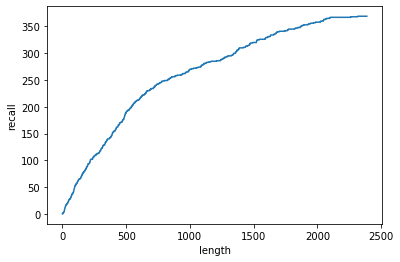

In [62]:
sns.lineplot(x="length",
               y="recall",
               data=size_rankings_df)

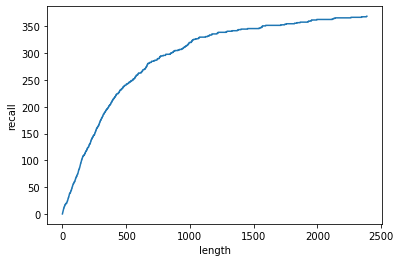

In [63]:
sns.lineplot(x="length",
               y="recall",
               data=nn_score_rankings_df)

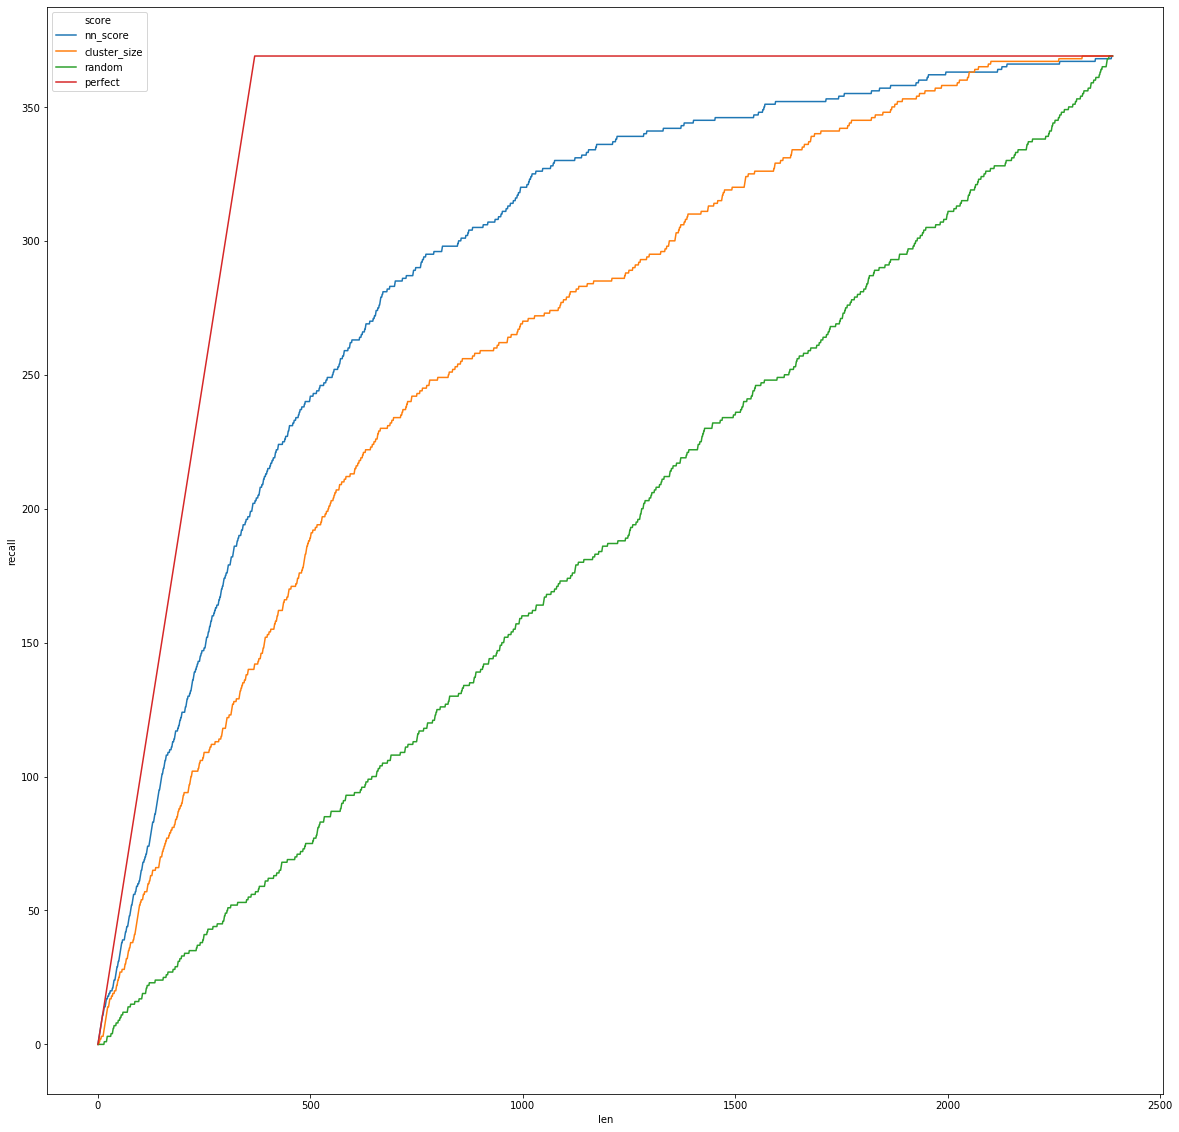

In [64]:
fix, ax = plt.subplots(figsize=(20,20))

sns.lineplot(x="len",
               y="recall",
               data=recall_length_df,
             hue="score",
            ax=ax)

In [65]:
y.shape

torch.Size([2389])

In [66]:
y_hat.shape

torch.Size([2389])

In [67]:
# Get recall and precission for different cutoffs
points = []
for cutoff in np.linspace(0, 1, 100):
    precision = get_precision(y_hat, y, cutoff)
    recall = get_recall(y_hat, y, cutoff)
    points.append({"cutoff": cutoff,
                   "precision": precision, 
                   "recall":recall,
                  "num_predicted_positives": len(y_hat[y_hat > cutoff]),
                  "num_true_positives": len(y[y_hat > cutoff][y[y_hat > cutoff] == 1])})

In [68]:
stats = pd.DataFrame(points).set_index("cutoff")

In [69]:
stats

,num_predicted_positives,num_true_positives,precision,recall
cutoff,,,,
0.000000,2389,369,0.154458,1.000000
0.010101,1777,355,0.199775,0.962060
0.020202,1404,345,0.245726,0.934959
0.030303,1195,336,0.281172,0.910569
0.040404,1071,328,0.306256,0.888889
0.050505,969,313,0.323013,0.848238
0.060606,884,305,0.345023,0.826558
0.070707,814,298,0.366093,0.807588
0.080808,777,295,0.379665,0.799458


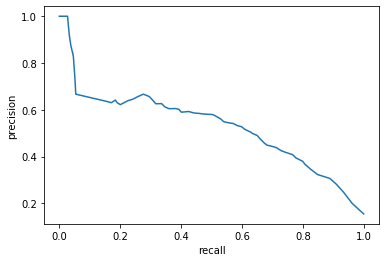

In [70]:
sns.lineplot(x="recall",
               y="precision",
               data=stats)

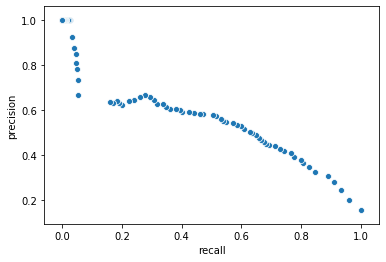

In [71]:
sns.scatterplot(x="recall",
               y="precision",
               data=stats,
            estimator=None)

In [72]:
stats.iloc[0].num_true_positives / stats.iloc[0].num_predicted_positives

0.1544579321892005

In [73]:
base_precision = len(events_test[events_test["Ligand Confidence"] == "High"]) / len(events_train)
base_precision

NameError: name 'events_train' is not defined

# Evaluate - Train Data

In [ ]:
y_test = []
y_test_hat = []

In [ ]:
for i, data in enumerate(train_dataloader):
    # get the inputs; data is a list of [inputs, labels]
    print("Iteration: {}".format(i))
    x = data["x"]
    y = data["y"]
#     x = x.unsqueeze(1)
    y = y.view(-1,1)
    
    outputs = model(x)
    
    y_test.append(y.detach())
    y_test_hat.append(outputs.detach())
#     optimizer.zero_grad()
    gc.collect()

In [ ]:
y = torch.cat(y_test)
y_hat = torch.cat(y_test_hat)

In [ ]:
# Get recall and precission for different cutoffs
points = []
for cutoff in np.linspace(0, 1, 50):
    precision = get_precision(y_hat, y, cutoff)
    recall = get_recall(y_hat, y, cutoff)
    points.append({"cutoff": cutoff,
                   "precision": precision, 
                   "recall":recall})

In [ ]:
stats = pd.DataFrame(points).set_index("cutoff")

In [ ]:
stats

In [ ]:
sns.lineplot(x="recall",
               y="precision",
               data=stats,
            estimator=None)

In [ ]:
sns.scatterplot(x="recall",
               y="precision",
               data=stats,
            estimator=None)

In [ ]:
base_precision = len(events_train[events_train["ligand_confidence_inspect"] == "High"]) / len(events_train)
base_precision

In [ ]:
while True:
    time.sleep(60)

In [ ]:
torch.save(model.state_dict(), "model_params.pt")

# Inspect Model

In [ ]:
trace.history

In [ ]:
iterator = dataset.make_one_shot_iterator()

In [ ]:
x, y = iterator.next()

In [ ]:
x

In [ ]:
model.net(x)

In [ ]:
print(y)

In [ ]:
model.save_weights("model_32.h5")

In [ ]:
from torch.ignite.engine import Events, create_supervised_trainer, create_supervised_evaluator

In [ ]:
trainer = create_supervised_trainer(model, optimizer, loss)

In [ ]:
@trainer.on(Events.EPOCH_COMPLETED)
def print